In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_sas("bankloan.sas7bdat")

In [3]:
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41.0,3.0,17.0,12.0,176.0,9.3,11.359392,5.008608,1.0
1,27.0,1.0,10.0,6.0,31.0,17.3,1.362202,4.000798,0.0
2,40.0,1.0,15.0,14.0,55.0,5.5,0.856075,2.168925,0.0
3,41.0,1.0,15.0,14.0,120.0,2.9,2.658720,0.821280,0.0
4,24.0,2.0,2.0,0.0,28.0,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...,...
845,34.0,1.0,12.0,15.0,32.0,2.7,0.239328,0.624672,NaN
846,32.0,2.0,12.0,11.0,116.0,5.7,4.026708,2.585292,NaN
847,48.0,1.0,13.0,11.0,38.0,10.8,0.722304,3.381696,NaN
848,35.0,2.0,1.0,11.0,24.0,7.8,0.417456,1.454544,NaN


In [4]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [5]:
df1=df[0:700]

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    float64
 1   ed        700 non-null    float64
 2   employ    700 non-null    float64
 3   address   700 non-null    float64
 4   income    700 non-null    float64
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(9)
memory usage: 49.3 KB


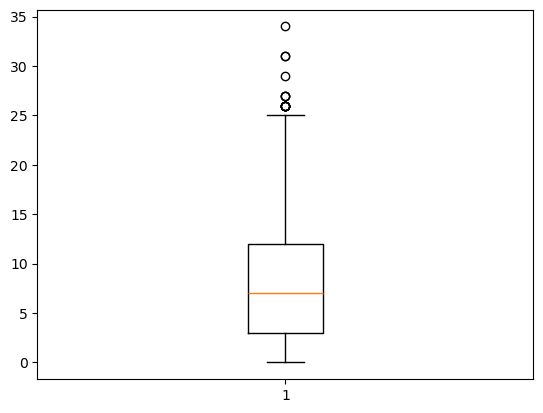

In [7]:
plt.boxplot(df1["address"])
plt.show()

In [8]:
def IQR(x):
    q1=x.quantile(.25)
    q3=x.quantile(.75)
    IQR=q3-q1
    lf=q1-(1.5*IQR)
    uf=q3+(1.5*IQR)
    print("lf-->",lf,"uf-->",uf)

In [9]:
IQR(df1["address"])

lf--> -10.5 uf--> 25.5


In [10]:
df1["address"]=np.where(df1["address"]>25.5,25.5,df1["address"])

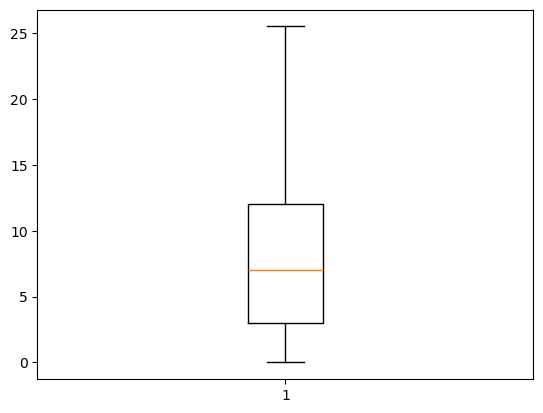

In [11]:
plt.boxplot(df1["address"])
plt.show()

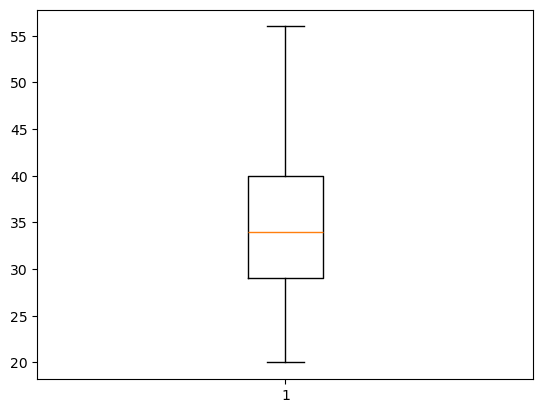

In [12]:
plt.boxplot(df1["age"])
plt.show()

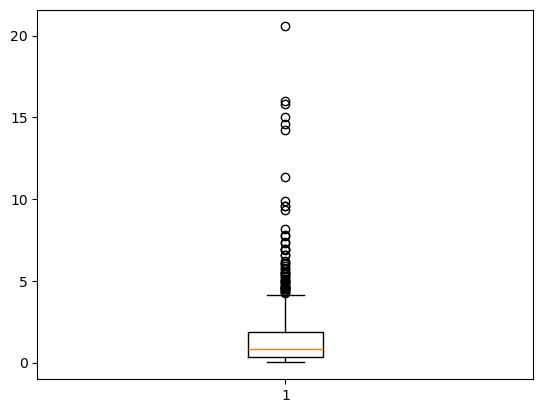

In [13]:
plt.boxplot(df1["creddebt"])
plt.show()

In [14]:
IQR(df1["creddebt"])

lf--> -1.9302843749999996 uf--> 4.201298625


In [15]:
df1["creddebt"]=np.where(df1["creddebt"]>4.2,4.2,df1["creddebt"])

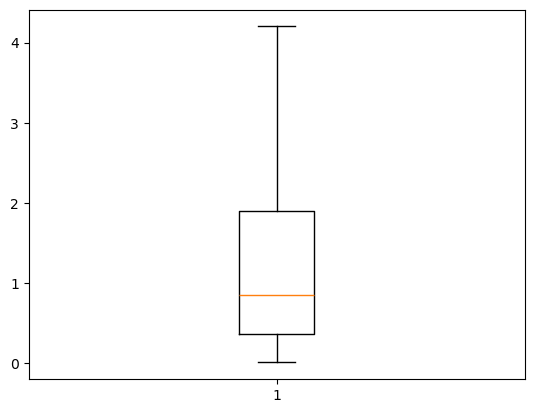

In [16]:
plt.boxplot(df1["creddebt"])
plt.show()

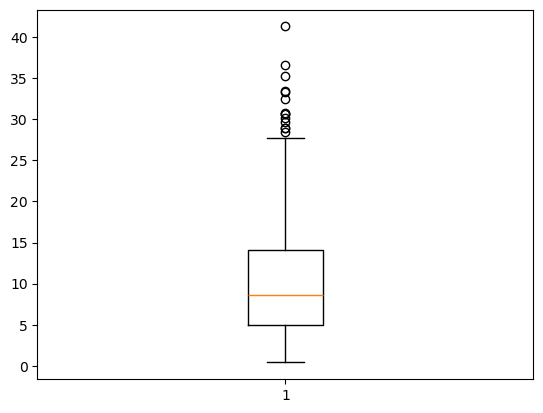

In [17]:
plt.boxplot(df1["debtinc"])
plt.show()

In [18]:
IQR(df1["debtinc"])

lf--> -8.687499999999996 uf--> 27.812499999999993


In [19]:
df1["debtinc"]=np.where(df1["debtinc"]>27.81,27.81,df1["debtinc"])

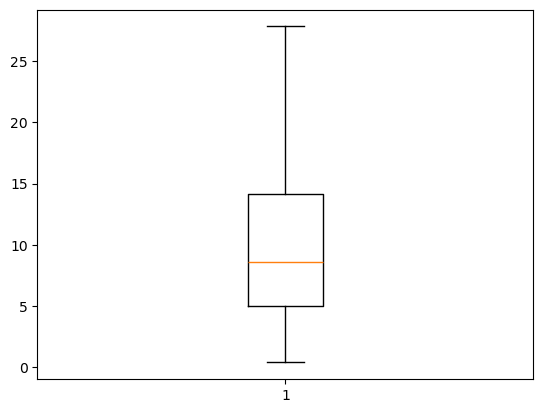

In [20]:
plt.boxplot(df1["debtinc"])
plt.show()

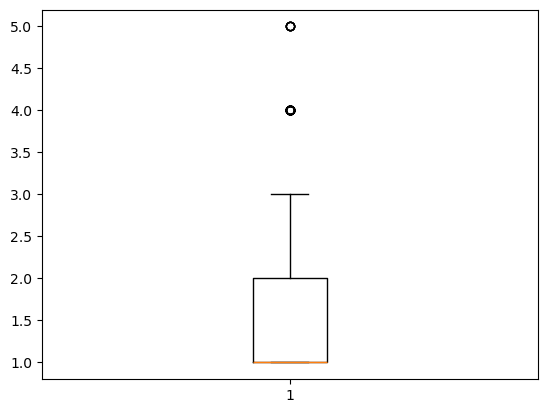

In [21]:
plt.boxplot(df1["ed"])
plt.show()

In [22]:
IQR(df1["ed"])

lf--> -0.5 uf--> 3.5


In [23]:
df1["ed"]=np.where(df1["ed"]>3.5,3.5,df1["ed"])

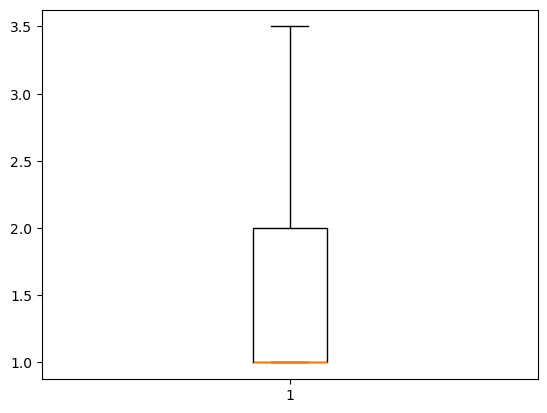

In [24]:
plt.boxplot(df1["ed"])
plt.show()

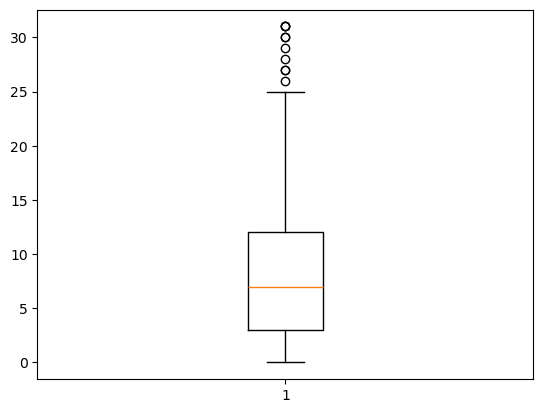

In [25]:
plt.boxplot(df1["employ"])
plt.show()

In [26]:
IQR(df1["employ"])

lf--> -10.5 uf--> 25.5


In [27]:
df1["employ"]=np.where(df1["employ"]>25.5,25.5,df1["employ"])

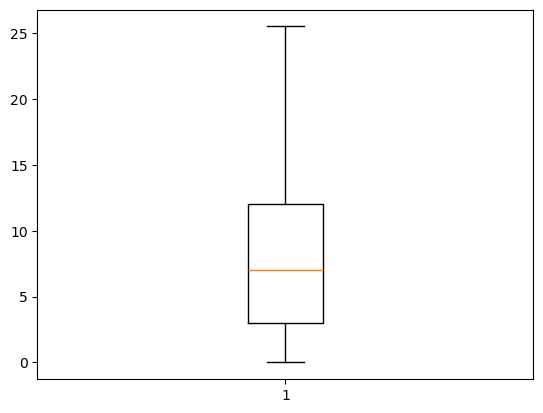

In [28]:
plt.boxplot(df1["employ"])
plt.show()

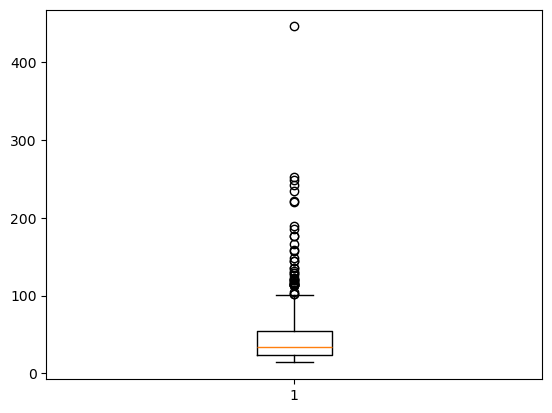

In [29]:
plt.boxplot(df1["income"])
plt.show()

In [30]:
IQR(df1["income"])

lf--> -22.5 uf--> 101.5


In [31]:
df1["income"]=np.where(df1["income"]>101.5,101.5,df1["income"])

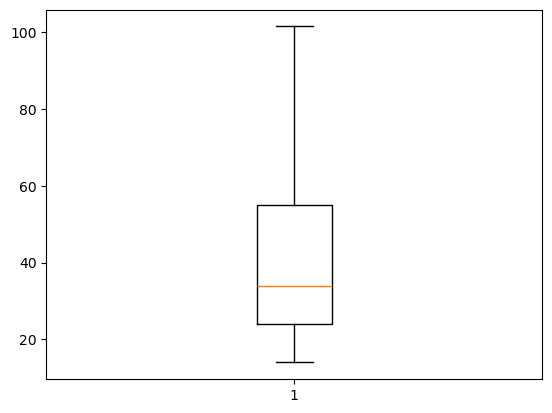

In [32]:
plt.boxplot(df1["income"])
plt.show()

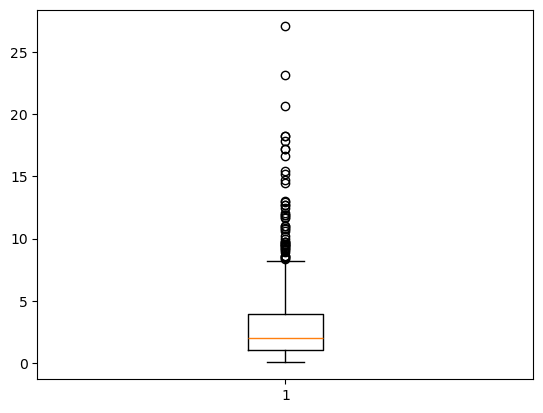

In [33]:
plt.boxplot(df1["othdebt"])
plt.show()

In [34]:
IQR(df1["othdebt"])

lf--> -3.2741515000000003 uf--> 8.2413945


In [35]:
df1["othdebt"]=np.where(df1["othdebt"]>8.24,8.24,df1["othdebt"])

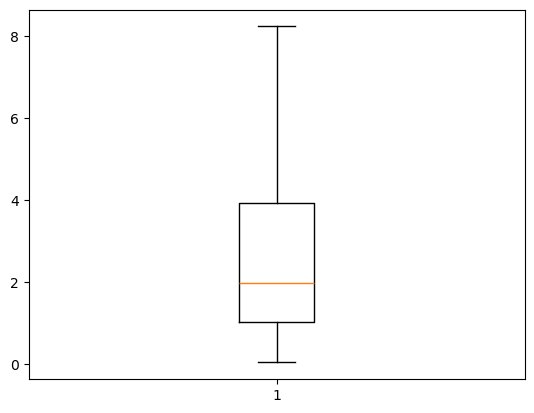

In [36]:
plt.boxplot(df1["othdebt"])
plt.show()

In [37]:
y=df1["default"]
x=df1.drop(columns="default")

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=88)

In [39]:
log=LogisticRegression()

In [40]:
log.fit(x_train,y_train)

LogisticRegression()

In [41]:
log.score(x_train,y_train)

0.8089285714285714

In [42]:
log.score(x_test,y_test)

0.7714285714285715

In [43]:
x_train_pro=pd.DataFrame(log.predict_proba(x_train),columns=["pro_0","pro_1"])

In [44]:
#log.predict_proba(x_train) gives value of pro_0&pro_1

In [45]:
x_test_pro=pd.DataFrame(log.predict_proba(x_test),columns=["pro_0","pro_1"])

In [46]:
x_train_pro["pre_y"]=np.where(x_train_pro["pro_1"]>0.5,1,0)

In [47]:
x_train_pro

,pro_0,pro_1,pre_y
0,0.491421,0.508579,1
1,0.252944,0.747056,1
2,0.846514,0.153486,0
3,0.870303,0.129697,0
4,0.882844,0.117156,0
...,...,...,...
555,0.035169,0.964831,1
556,0.930980,0.069020,0
557,0.613871,0.386129,0
558,0.439599,0.560401,1


In [48]:
x_train_pro["pre_y"].value_counts()

pre_y
0    457
1    103
Name: count, dtype: int64

In [49]:
y_train.value_counts()

default
0.0    412
1.0    148
Name: count, dtype: int64

In [50]:
x_train_pro["pre_y_2"]=log.predict(x_train)#m/c did the same as we did

In [51]:
x_train_pro.head(50)

,pro_0,pro_1,pre_y,pre_y_2
0,0.491421,0.508579,1,1.0
1,0.252944,0.747056,1,1.0
2,0.846514,0.153486,0,0.0
3,0.870303,0.129697,0,0.0
4,0.882844,0.117156,0,0.0
5,0.322470,0.677530,1,1.0
6,0.795857,0.204143,0,0.0
7,0.924708,0.075292,0,0.0
8,0.979943,0.020057,0,0.0
9,0.846180,0.153820,0,0.0


In [52]:
x_train_pro["actual_y"]=y_train

In [53]:
x_train_pro.head(50)

,pro_0,pro_1,pre_y,pre_y_2,actual_y
0,0.491421,0.508579,1,1.0,1.0
1,0.252944,0.747056,1,1.0,0.0
2,0.846514,0.153486,0,0.0,NaN
3,0.870303,0.129697,0,0.0,0.0
4,0.882844,0.117156,0,0.0,1.0
5,0.322470,0.677530,1,1.0,0.0
6,0.795857,0.204143,0,0.0,0.0
7,0.924708,0.075292,0,0.0,0.0
8,0.979943,0.020057,0,0.0,1.0
9,0.846180,0.153820,0,0.0,0.0


In [54]:
from sklearn import metrics

In [55]:
pd.DataFrame(log.predict_proba(x_train))[1]

0      0.508579
1      0.747056
2      0.153486
3      0.129697
4      0.117156
         ...   
555    0.964831
556    0.069020
557    0.386129
558    0.560401
559    0.004573
Name: 1, Length: 560, dtype: float64

In [56]:
pd.DataFrame(log.predict_proba(x_train))

,0,1
0,0.491421,0.508579
1,0.252944,0.747056
2,0.846514,0.153486
3,0.870303,0.129697
4,0.882844,0.117156
...,...,...
555,0.035169,0.964831
556,0.930980,0.069020
557,0.613871,0.386129
558,0.439599,0.560401


In [57]:
pre_train=pd.DataFrame(log.predict_proba(x_train),columns=["pro_0","pro_1"])

In [58]:
pre_train.drop(columns="pro_0",inplace=True)

In [59]:
y_pre=np.where(pre_train>0.6,1,0)

In [60]:
print(metrics.classification_report(y_train,log.predict(x_train)))
print("**********************************************************************")
print(metrics.classification_report(y_train,y_pre))

              precision    recall  f1-score   support

         0.0       0.83      0.92      0.88       412
         1.0       0.70      0.49      0.57       148

    accuracy                           0.81       560
   macro avg       0.77      0.71      0.73       560
weighted avg       0.80      0.81      0.80       560

**********************************************************************
              precision    recall  f1-score   support

         0.0       0.81      0.96      0.88       412
         1.0       0.79      0.37      0.50       148

    accuracy                           0.81       560
   macro avg       0.80      0.67      0.69       560
weighted avg       0.80      0.81      0.78       560



In [61]:
'''
outliers
log=logistic regression()
log.score(x_train,y_train)it will rint accuracy of train data
log.score(x_test,y_test)print accuracy of test data
from sklearn import metrics
print metrics.classification_report(actual,pre)
'''

'\noutliers\nlog=logistic regression()\nlog.score(x_train,y_train)it will rint accuracy of train data\nlog.score(x_test,y_test)print accuracy of test data\nfrom sklearn import metrics\nprint metrics.classification_report(actual,pre)\n'

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [126]:
dt=DecisionTreeClassifier(random_state=88)

In [128]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=88)

In [132]:
print("train acurracy",dt.score(x_train,y_train))

train acurracy 1.0


In [134]:
print("test accuracy",dt.score(x_test,y_test))

test accuracy 0.7071428571428572
